In [ ]:
# Step 1: Install necessary packages
!pip install moviepy opencv-python transformers

In [ ]:
!pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 29.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.0 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801360 sha256=cabee5bff75ce24bf08a6c48e31317c0bb755529bab4b1c2c094c08a806b1eb2
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper


In [ ]:
!pip install torch torchvision
#!pip install yolov5


In [ ]:
# Step 2: Import libraries
import os
import cv2
import numpy as np
from moviepy.editor import VideoFileClip

# Step 3: Create a directory to save frames
os.makedirs("frames", exist_ok=True)

# Step 4: Extract frames at regular intervals (e.g., every 5 seconds)
def extract_frames(video_path, interval=5):
    clip = VideoFileClip(video_path)
    duration = int(clip.duration)

    for t in range(0, duration, interval):
        frame = clip.get_frame(t)
        frame_path = f"frames/frame_{t}.jpg"
        cv2.imwrite(frame_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # Save frame as JPEG
        print(f"Saved frame at {t} seconds as {frame_path}")

# Step 5: Detect scene transitions based on frame differences (using histograms)
def detect_scenes(video_path, interval=5, threshold=0.3):
    clip = VideoFileClip(video_path)
    duration = int(clip.duration)
    prev_frame = None

    key_scenes = []

    for t in range(0, duration, interval):
        frame = clip.get_frame(t)
        curr_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)  # Convert to grayscale

        if prev_frame is not None:
            # Calculate histogram difference
            diff = cv2.absdiff(prev_frame, curr_frame)
            hist_diff = np.sum(diff) / np.prod(diff.shape)  # Normalized histogram difference

            # Check if the difference exceeds the threshold, marking a scene change
            if hist_diff > threshold:
                key_scenes.append(t)
                print(f"Scene change detected at {t} seconds. Histogram diff: {hist_diff}")

        prev_frame = curr_frame

    return key_scenes

# Step 6: Main execution

# Provide the path to your video file here
video_path = "/content/The Performance-oriented ŠKODA SLAVIA 1.5 L TSI - A Class of its Own.mp4"

# Extract frames at intervals
extract_frames(video_path, interval=5)

# Detect scenes based on histogram differences
key_scenes = detect_scenes(video_path, interval=5, threshold=0.3)
print(f"Key scenes detected at: {key_scenes} seconds")


Saved frame at 0 seconds as frames/frame_0.jpg
Saved frame at 5 seconds as frames/frame_5.jpg
Saved frame at 10 seconds as frames/frame_10.jpg
Saved frame at 15 seconds as frames/frame_15.jpg
Saved frame at 20 seconds as frames/frame_20.jpg
Saved frame at 25 seconds as frames/frame_25.jpg
Saved frame at 30 seconds as frames/frame_30.jpg
Saved frame at 35 seconds as frames/frame_35.jpg
Saved frame at 40 seconds as frames/frame_40.jpg
Saved frame at 45 seconds as frames/frame_45.jpg
Saved frame at 50 seconds as frames/frame_50.jpg
Saved frame at 55 seconds as frames/frame_55.jpg
Scene change detected at 5 seconds. Histogram diff: 58.789739583333336
Scene change detected at 10 seconds. Histogram diff: 33.34220052083333
Scene change detected at 15 seconds. Histogram diff: 48.802608506944445
Scene change detected at 20 seconds. Histogram diff: 59.53203125
Scene change detected at 25 seconds. Histogram diff: 41.78706163194445
Scene change detected at 30 seconds. Histogram diff: 55.9699956597

In [ ]:


# Import libraries
from moviepy.editor import VideoFileClip
import whisper
import cv2
import numpy as np
#import openai
import os

# Set your OpenAI API key
#openai.api_key = 'your-openai-api-key'

# Function to extract audio from video
def extract_audio(video_path, audio_path):
    video_clip = VideoFileClip(video_path)
    audio_clip = video_clip.audio
    audio_clip.write_audiofile(audio_path)
    print(f"Audio extracted and saved as {audio_path}")

# Function to transcribe audio using Whisper
def transcribe_audio(audio_path):
    model = whisper.load_model("medium")
    result = model.transcribe(audio_path,language="en",temperature=0.6,verbose=True)
    return result['text']

# Function to extract frames at regular intervals
def extract_frames(video_path, interval=5):
    clip = VideoFileClip(video_path)
    duration = int(clip.duration)

    frames = []
    for t in range(0, duration, interval):
        frame = clip.get_frame(t)
        frame_path = f"frames/frame_{t}.jpg"
        cv2.imwrite(frame_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
        frames.append((t, frame_path))
        print(f"Saved frame at {t} seconds as {frame_path}")
    return frames

# Function to generate a description for a scene using GPT-3
def generate_scene_description(transcription, frame_path):
    prompt = f"Describe the scene based on the following transcription and visual context: {transcription}"
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=150
    )
    description = response.choices[0].text.strip()
    return description

# Path to your video and audio files
video_path = "/content/The Performance-oriented ŠKODA SLAVIA 1.5 L TSI - A Class of its Own.mp4"
audio_path = "extracted_audio.wav"

# Extract audio and transcribe it
extract_audio(video_path, audio_path)
transcription = transcribe_audio(audio_path)
print("Transcription:")
print(transcription)

# Extract frames from video
frames = extract_frames(video_path, interval=5)

# Generate descriptions for each frame
# for t, frame_path in frames:
#     # You might need to extract relevant transcription snippet based on timestamp
#     # Here, we use the whole transcription for simplicity
#     scene_description = generate_scene_description(transcription, frame_path)
#     print(f"Scene at {t} seconds:")
#     print(scene_description)
#     print()



MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.
Audio extracted and saved as extracted_audio.wav


100%|█████████████████████████████████████| 1.42G/1.42G [00:16<00:00, 93.2MiB/s]
  checkpoint = torch.load(fp, map_location=device)



[00:00.000 --> 00:04.160]  There are many routes one can take in life.
[00:06.160 --> 00:08.880]  Sometimes we take a beautiful but measured journey.
[00:13.040 --> 00:14.760]  But when life is full of choices,
[00:21.200 --> 00:23.480]  sometimes you just let the heart take over.
[00:30.000 --> 00:52.380]  When exhilaration drives you to aim higher, when emotion overtakes all else, Skoda SLAVIA
[00:52.380 --> 00:52.900]  1.5TSL
Transcription:
 There are many routes one can take in life. Sometimes we take a beautiful but measured journey. But when life is full of choices, sometimes you just let the heart take over. When exhilaration drives you to aim higher, when emotion overtakes all else, Skoda SLAVIA 1.5TSL
Saved frame at 0 seconds as frames/frame_0.jpg
Saved frame at 5 seconds as frames/frame_5.jpg
Saved frame at 10 seconds as frames/frame_10.jpg
Saved frame at 15 seconds as frames/frame_15.jpg
Saved frame at 20 seconds as frames/frame_20.jpg
Saved frame at 25 seconds as frames/fra

In [ ]:
# Install required packages


# Import libraries
from moviepy.editor import VideoFileClip
import whisper
import cv2
import numpy as np

import os
from transformers import GPT2Tokenizer, GPT2LMHeadModel


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
# Function to extract audio from video
def extract_audio(video_path, audio_path):
    video_clip = VideoFileClip(video_path)
    audio_clip = video_clip.audio
    audio_clip.write_audiofile(audio_path)
    print(f"Audio extracted and saved as {audio_path}")

# Function to transcribe audio using Whisper
def transcribe_audio(audio_path):
    model = whisper.load_model("medium")
    result = model.transcribe(audio_path,language="en",temperature=0.6,verbose=True)
    segments = result['segments']
    return segments


# Function to extract frames at regular intervals
def extract_frame_for_segment(video_path, start, end, segment_index):
    clip = VideoFileClip(video_path)
    middle_time = (start + end) / 2
    frame = clip.get_frame(middle_time)
    frame_path = f"frames/frame_segment_{segment_index}.jpg"
    cv2.imwrite(frame_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    print(f"Saved frame at {middle_time:.2f} seconds as {frame_path}")
    return frame_path

def generate_scene_description_gpt2(segment_text,frame_path, start, end):
    # Adjusted prompt for GPT-2
    input_text = f"Describe the visual scene based on the transcription: '{segment_text}' from {start:.2f} to {end:.2f} seconds."

    # Tokenize input text
    inputs = tokenizer.encode(input_text, return_tensors="pt", padding=True, truncation=True)

    # Create attention mask (non-padded tokens get 1, padded tokens get 0)
    attention_mask = (inputs != tokenizer.pad_token_id).long()

    # Generate text using GPT-2
    outputs = model.generate(inputs, max_length=100, num_beams=5, no_repeat_ngram_size=2,
                             early_stopping=True, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id)

    # Decode and return the generated text
    description = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return description

# Path to your video and audio files
video_path = "/content/The Performance-oriented ŠKODA SLAVIA 1.5 L TSI - A Class of its Own.mp4"
audio_path = "/content/extracted_audio.wav"

# Extract audio and transcribe it
#extract_audio(video_path, audio_path)
segments = transcribe_audio(audio_path)

# Extract frames from video
frames = extract_frames(video_path, interval=5)

# Extract frames based on transcription segments
for idx, seg in enumerate(segments):
    start, end, text = seg['start'], seg['end'], seg['text']
    frame_path = extract_frame_for_segment(video_path, start, end, idx)
    scene_description = generate_scene_description_gpt2(text, frame_path, start, end)
    print(f"Scene from {start:.2f} to {end:.2f} seconds:")
    print(scene_description)
    print()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

  warnings.warn(



model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

  checkpoint = torch.load(fp, map_location=device)



[00:00.000 --> 00:06.580]  There are many routes one can take in life.
[00:06.580 --> 00:09.900]  Sometimes we take a beautiful, but measured journey.
[00:09.900 --> 00:21.680]  But when life is full of choices.
[00:21.680 --> 00:23.920]  as you just let the heart take over.
[00:42.080 --> 00:44.460]  When exhilaration drives you to aim higher,
[00:46.220 --> 00:48.240]  when emotion overtakes all else.
[00:48.240 --> 00:52.600]  Scoda Slavia 1.5 TSI
Saved frame at 0 seconds as frames/frame_0.jpg
Saved frame at 5 seconds as frames/frame_5.jpg
Saved frame at 10 seconds as frames/frame_10.jpg
Saved frame at 15 seconds as frames/frame_15.jpg
Saved frame at 20 seconds as frames/frame_20.jpg
Saved frame at 25 seconds as frames/frame_25.jpg
Saved frame at 30 seconds as frames/frame_30.jpg
Saved frame at 35 seconds as frames/frame_35.jpg
Saved frame at 40 seconds as frames/frame_40.jpg
Saved frame at 45 seconds as frames/frame_45.jpg
Saved frame at 50 seconds as frames/frame_50.jpg


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Saved frame at 55 seconds as frames/frame_55.jpg
Saved frame at 3.29 seconds as frames/frame_segment_0.jpg


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Scene from 0.00 to 6.58 seconds:
Describe the visual scene based on the transcription:'There are many routes one can take in life.' from 0.00 to 6.58 seconds.

From 0 to 7.59 seconds, the sequence is repeated. From 7 to 8.57 seconds the sequences are repeated, and from 8 to 9.25 seconds they are reversed. The sequence repeats from 9 to 10.50 seconds and then from 11 to 12.75 seconds to the end of the final sequence.


The

Saved frame at 8.24 seconds as frames/frame_segment_1.jpg


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Scene from 6.58 to 9.90 seconds:
Describe the visual scene based on the transcription:'Sometimes we take a beautiful, but measured journey.' from 6.58 to 9.90 seconds.

This is the first time I've seen a video of this kind. I'm not sure if it's because I don't know what it is, or if I just didn't see it. But I do know that this is a great video, and I think it captures the essence of what we're trying to do. It's

Saved frame at 15.79 seconds as frames/frame_segment_2.jpg


KeyboardInterrupt: 

In [ ]:
from moviepy.editor import VideoFileClip
from PIL import Image
import os

# Create a directory to save the frames
os.makedirs('frames', exist_ok=True)

def extract_frames(video_path, intervals):
    video = VideoFileClip(video_path)
    for i, time in enumerate(intervals):
        frame = video.get_frame(time)
        frame_path = f'frames/frame_{i}.jpg'
        frame_image = Image.fromarray(frame)
        frame_image.save(frame_path)
        print(f"Saved frame at {time} seconds as {frame_path}")
    video.close()

# Example intervals (one per second)
intervals = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
video_path = '/content/The Performance-oriented ŠKODA SLAVIA 1.5 L TSI - A Class of its Own.mp4'
extract_frames(video_path, intervals)


Saved frame at 0 seconds as frames/frame_0.jpg
Saved frame at 5 seconds as frames/frame_1.jpg
Saved frame at 10 seconds as frames/frame_2.jpg
Saved frame at 15 seconds as frames/frame_3.jpg
Saved frame at 20 seconds as frames/frame_4.jpg
Saved frame at 25 seconds as frames/frame_5.jpg
Saved frame at 30 seconds as frames/frame_6.jpg
Saved frame at 35 seconds as frames/frame_7.jpg
Saved frame at 40 seconds as frames/frame_8.jpg
Saved frame at 45 seconds as frames/frame_9.jpg
Saved frame at 50 seconds as frames/frame_10.jpg


In [ ]:
import cv2
import numpy as np
from yolov5 import YOLOv5

# Initialize YOLO model (ensure you have the model weights)
yolo_model = YOLOv5('yolov5s.pt')  # Adjust the model path as needed

def detect_objects_in_frame(frame_path):
    img = cv2.imread(frame_path)
    results = yolo_model.predict(img)
    detected_objects = [result['name'] for result in results.pandas().xyxy[0].to_dict(orient='records')]
    return detected_objects

# Example usage
frame_path = 'frames/frame_2.jpg'
detected_objects = detect_objects_in_frame(frame_path)
print(f"Objects detected in {frame_path}: {detected_objects}")


  with amp.autocast(autocast):



Objects detected in frames/frame_2.jpg: ['car']


In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Initialize BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')

def generate_visual_scene_description_bart(detected_objects, frame_path):
    visual_context = ', '.join(detected_objects) if detected_objects else 'no prominent objects detected'
    input_text = (
        f"Imagine you are looking at a frame from a video. The detected objects in the frame are: {visual_context}. "
        f"Provide a detailed and vivid description of the visual scene in the frame located at {frame_path}. "
        "Include details about the environment, objects' interactions, colors, and any other relevant visual elements."
    )

    # Encode the input text
    inputs = tokenizer.encode(input_text, return_tensors="pt", truncation=True, max_length=512)

    # Generate text using BART
    outputs = model.generate(inputs, max_length=300, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)

    # Decode and return the generated text
    description = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return description

# Example usage
def detect_objects_in_frame(frame_path):
    img = cv2.imread(frame_path)
    results = yolo_model.predict(img)
    detected_objects = [result['name'] for result in results.pandas().xyxy[0].to_dict(orient='records')]
    return detected_objects

frame_path = 'frames/frame_2.jpg'
detected_objects = detect_objects_in_frame(frame_path)
description = generate_visual_scene_description_bart(detected_objects, frame_path)
print(f"Description for {frame_path}: {description}")


  warnings.warn(

  with amp.autocast(autocast):



Description for frames/frame_2.jpg: Imagine you are looking at a frame from a video. Provide a detailed and vivid description of the visual scene in the frame located at frames/frame_2.jpg. Include details about the environment, objects' interactions, colors, and any other relevant visual elements. In this example, the scene is a car driving through a parking lot. The detected objects are:


In [ ]:
!pip install ultralytics moviepy opencv-python torch torchvision transformers
!pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 24.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.3 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801360 sha256=651b937e177052ce1ba05ad5eda4aa79461af88c31dfc97ba82e22fc87fe1873
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper


MoviePy - Writing audio in /content/extracted_audio.wav


MoviePy - Done.
Audio extracted and saved as /content/extracted_audio.wav

0: 384x640 (no detections), 252.5ms
Speed: 37.5ms preprocess, 252.5ms inference, 10.1ms postprocess per image at shape (1, 3, 384, 640)
Interval 0-10 seconds:
Objects Detected: []
Scene Explanation: Scene:. Transcript:  There are


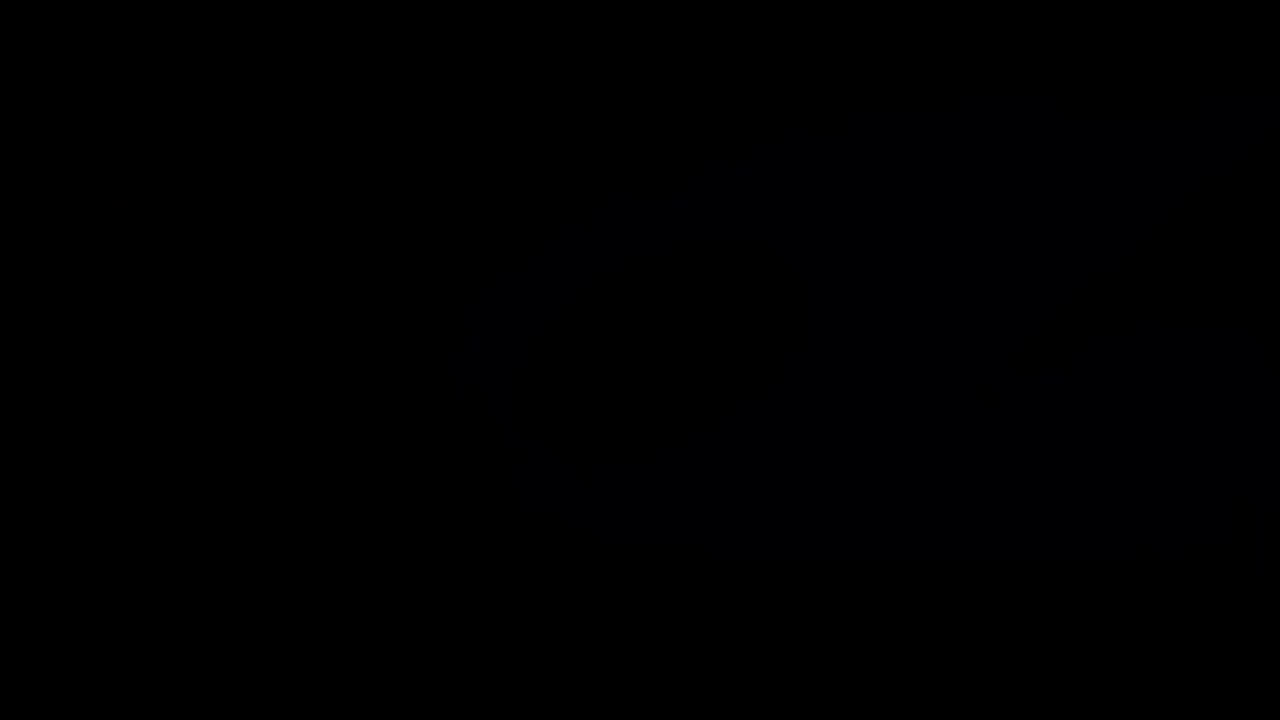


0: 384x640 1 car, 7.2ms
Speed: 2.0ms preprocess, 7.2ms inference, 90.2ms postprocess per image at shape (1, 3, 384, 640)
Interval 10-20 seconds:
Objects Detected: [{'name': 'car', 'confidence': 0.9037929177284241}]
Scene Explanation: Scene: car. Transcript:  many years ago


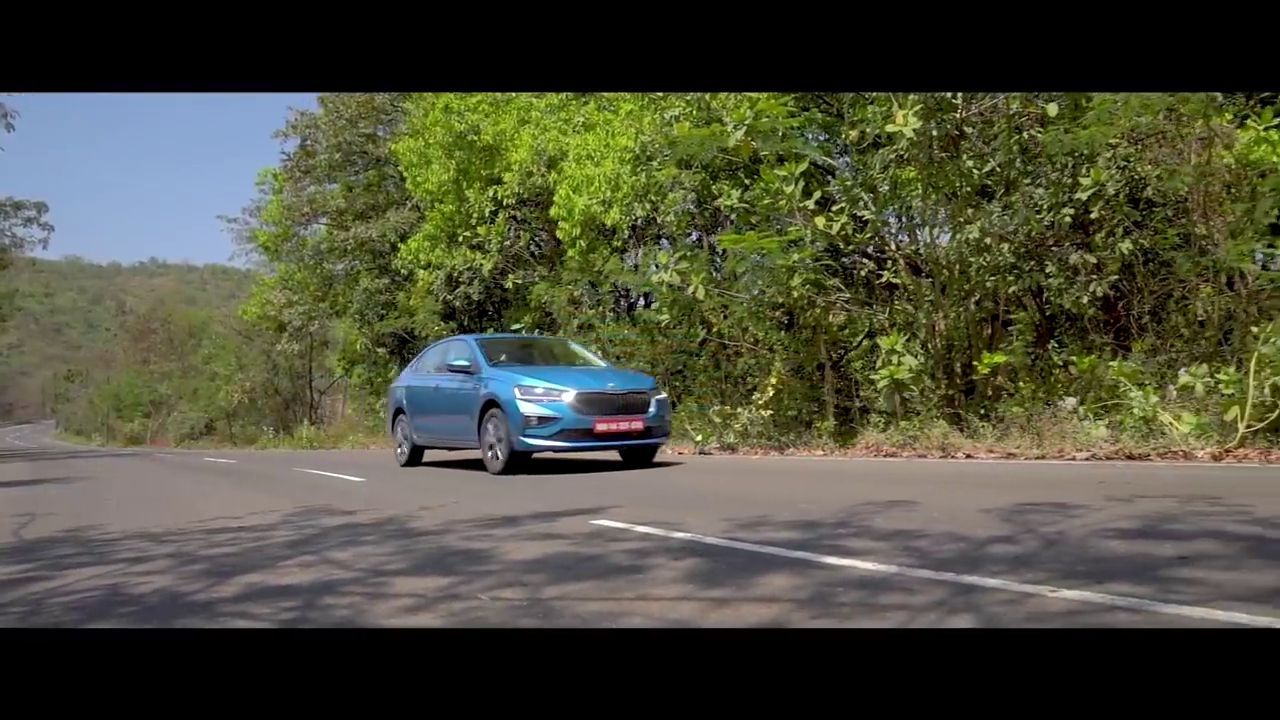


0: 384x640 1 person, 1 toilet, 9.5ms
Speed: 2.4ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Interval 20-30 seconds:
Objects Detected: [{'name': 'person', 'confidence': 0.7276706099510193}, {'name': 'toilet', 'confidence': 0.25915729999542236}]
Scene Explanation: Scene: person toilet. Transcript: "No one can


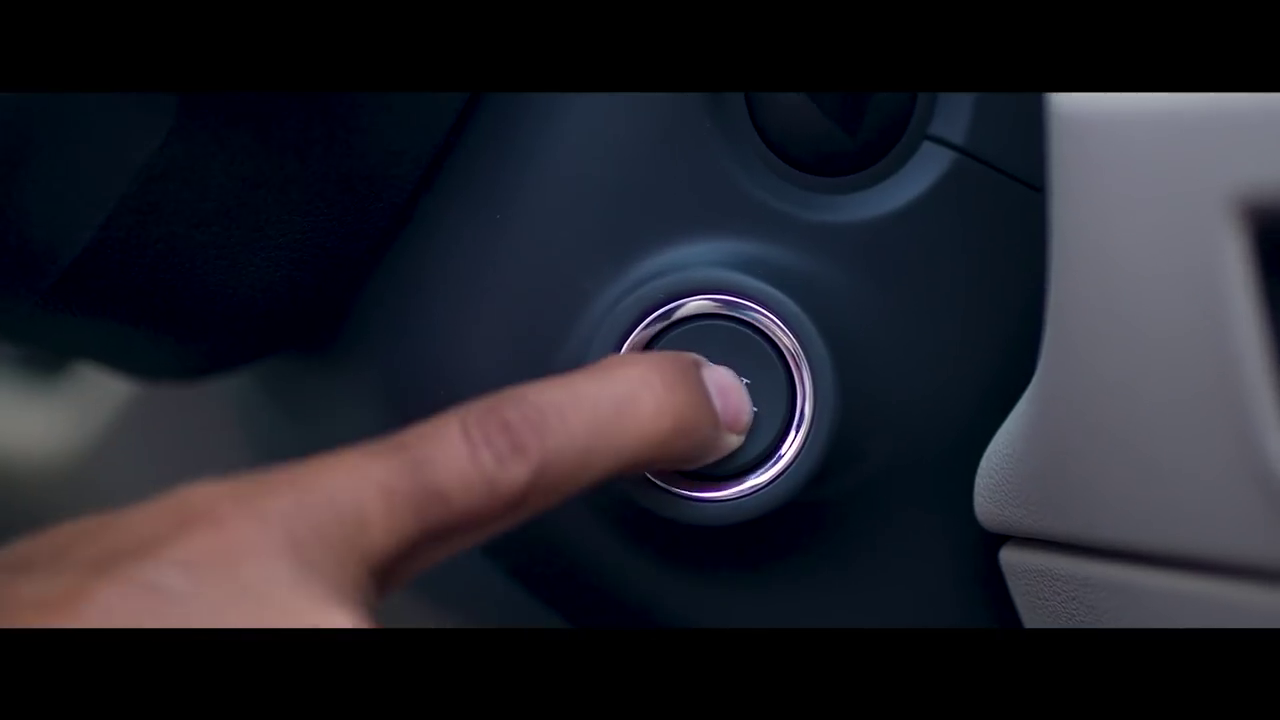


0: 384x640 1 cell phone, 12.1ms
Speed: 4.9ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Interval 30-40 seconds:
Objects Detected: [{'name': 'cell phone', 'confidence': 0.3210511803627014}]
Scene Explanation: Scene: cell phone. Transcript:  take in l


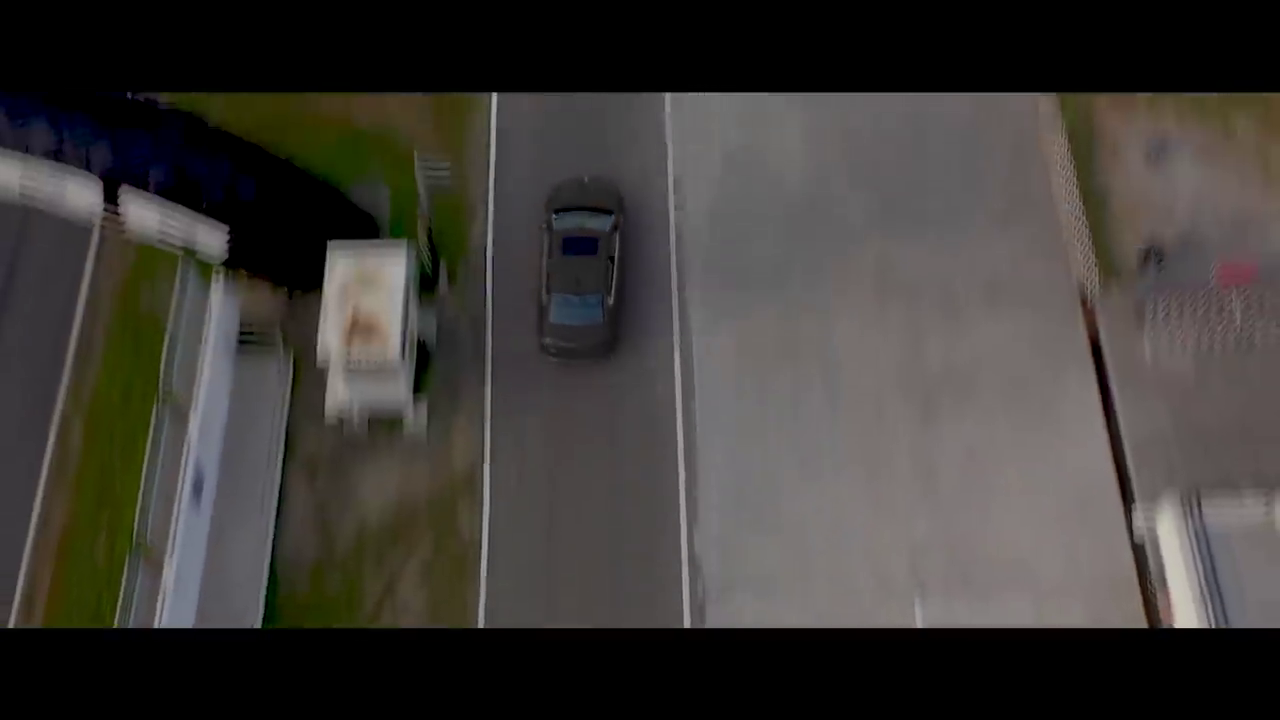


0: 384x640 1 airplane, 10.8ms
Speed: 2.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Interval 40-50 seconds:
Objects Detected: [{'name': 'airplane', 'confidence': 0.3422975242137909}]
Scene Explanation: Scene: airplane. Transcript: ife. Somet


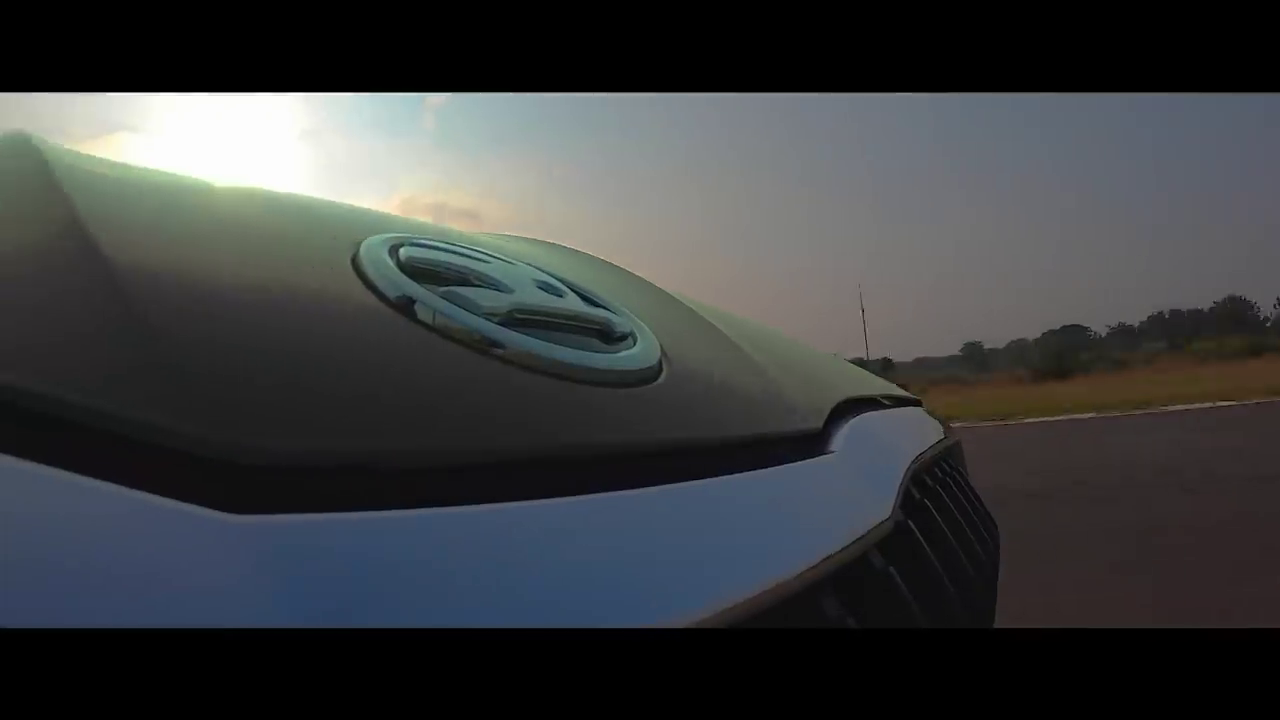


0: 384x640 1 car, 10.4ms
Speed: 2.3ms preprocess, 10.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Interval 50-60 seconds:
Objects Detected: [{'name': 'car', 'confidence': 0.7283216714859009}]
Scene Explanation: Scene: car. Transcript: imes we ta


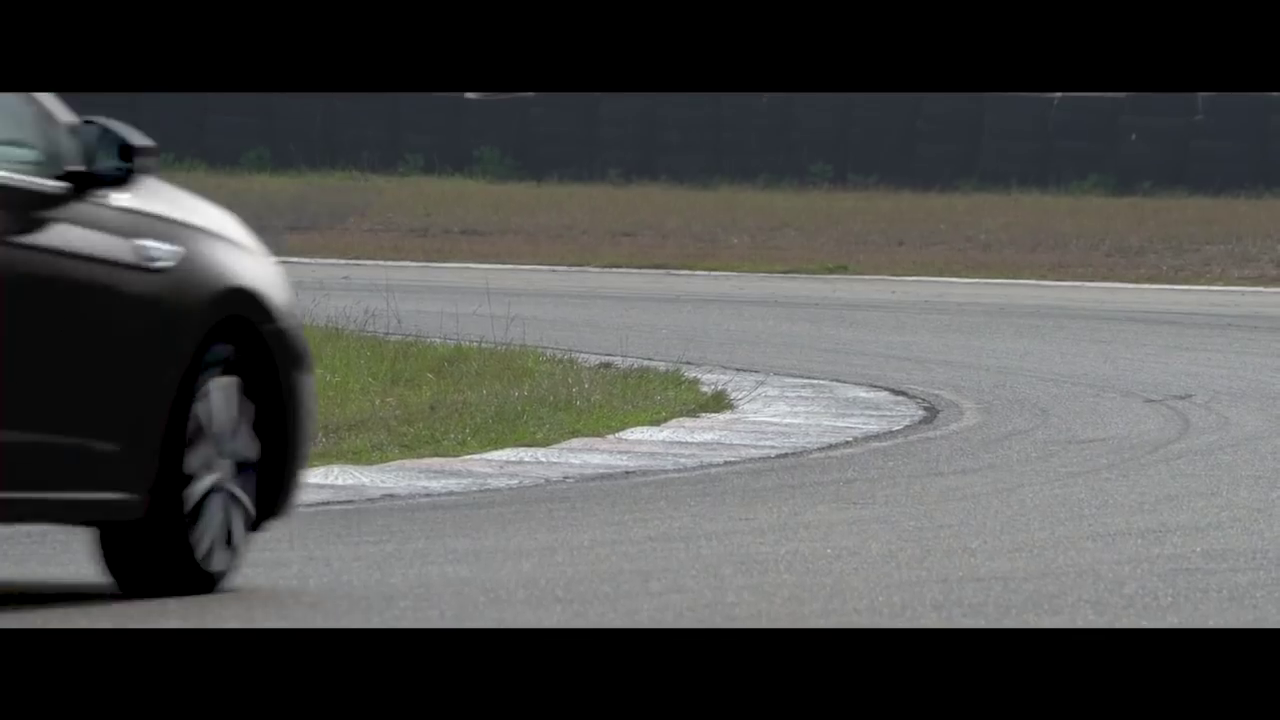


0: 384x640 (no detections), 9.8ms
Speed: 2.6ms preprocess, 9.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Interval 60-70 seconds:
Objects Detected: []
Scene Explanation: Scene:. Transcript: ke a beaut


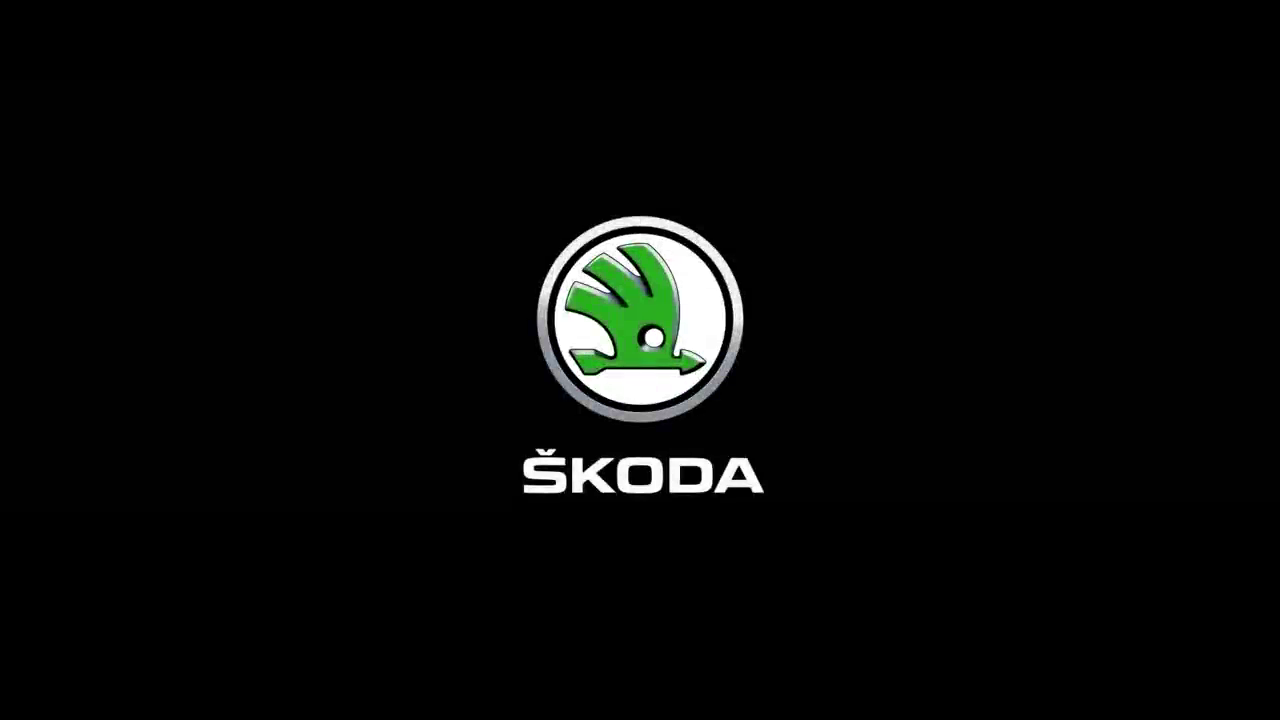

In [ ]:
import cv2
import torch
from transformers import CLIPProcessor, CLIPModel, BartTokenizer, BartForConditionalGeneration
from moviepy.editor import VideoFileClip
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from transformers import pipeline
import numpy as np
from PIL import Image
import whisper
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load YOLOv8, CLIP, BART, and Whisper models
yolo_model = YOLO('yolov8n.pt')
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")
bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
whisper_model = whisper.load_model("base")

# Extract audio from video using MoviePy
def extract_audio(video_path, audio_path):
    video_clip = VideoFileClip(video_path)
    audio_clip = video_clip.audio
    audio_clip.write_audiofile(audio_path)
    print(f"Audio extracted and saved as {audio_path}")
# Transcribe audio using Whisper
def transcribe_audio(audio_path):
    result = whisper_model.transcribe(audio_path)
    return result['text']

# Function to extract frames from video at specific intervals (e.g., every 10 seconds)
def extract_key_frames(video_path, interval=10):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)  # Get frames per second
    key_frames = []
    frame_count = 0
    success, frame = cap.read()

    while success:
        if frame_count % int(fps * interval) == 0:  # Capture a frame every 'interval' seconds
            key_frames.append(frame)
        success, frame = cap.read()
        frame_count += 1

    cap.release()
    return key_frames

# Generate scene description using BART based on objects and transcription
def generate_scene_description(objects, transcription):
    object_list = [obj['name'] for obj in objects]
    prompt = f"Scene: {' '.join(object_list)}. Transcript: {transcription}"

    inputs = bart_tokenizer(prompt, return_tensors="pt", max_length=1024, truncation=True)
    outputs = bart_model.generate(inputs['input_ids'], max_length=50, num_beams=4, early_stopping=True)
    description = bart_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return description

# Process frames for object detection and scene recognition using YOLO and CLIP
def process_frame(frame):
    # Object detection with YOLOv8
    results = yolo_model(frame)
    detected_objects = []

    for result in results:
        for box in result.boxes:
            class_id = int(box.cls)
            confidence = float(box.conf)
            object_name = yolo_model.names[class_id]
            detected_objects.append({'name': object_name, 'confidence': confidence})

    # Scene recognition with CLIP
    image = Image.fromarray(frame)
    inputs = clip_processor(images=image, return_tensors="pt")
    outputs = clip_model.get_image_features(**inputs)

    # Placeholder scene description (can be expanded based on CLIP output)
    scene_description = "Scene description based on image features."

    return detected_objects, scene_description

# Process video frames and generate explanations for key moments
def process_video(video_path, audio_path, interval=10):
    # Extract key frames every 10 seconds
    key_frames = extract_key_frames(video_path, interval=interval)

    # Transcribe the audio
    transcription = transcribe_audio(audio_path)

    for idx, frame in enumerate(key_frames):
        # Extract 10-second portion of the transcript
        start = idx * interval
        end = (idx + 1) * interval
        segment_transcription = transcription[start:end]

        # Process frame to detect objects and recognize scenes
        objects, scene_description = process_frame(frame)

        # Generate scene explanation by combining transcription and visual description
        scene_explanation = generate_scene_description(objects, segment_transcription)

        print(f"Interval {start}-{end} seconds:")
        print("Objects Detected:", objects)
        print("Scene Explanation:", scene_explanation)

        # Optionally display the frame
        cv2_imshow(frame)

# Example usage
video_path = "/content/The Performance-oriented ŠKODA SLAVIA 1.5 L TSI - A Class of its Own (1).mp4"
audio_path = "/content/extracted_audio.wav"

# 1. Extract audio from the video
extract_audio(video_path, audio_path)

# 2. Process video and audio to generate explanations
process_video(video_path, audio_path, interval=10)


In [ ]:
!pip install opencv-python torchvision torchaudio ultralytics transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 20.5 MB/s eta 0:00:00


In [ ]:
import json
from transformers import BartTokenizer, BartForConditionalGeneration
import torch

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')

# Detect if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bart_model = bart_model.to(device)

def clean_input(input_text):
    # Remove unwanted characters or symbols
    allowed_chars = ''.join(chr(i) for i in range(32, 127))  # ASCII characters from space to tilde (~)
    cleaned_text = ''.join(c for c in input_text if c in allowed_chars)
    return cleaned_text

def generate_description(detections_summary):
    # Combine detections summary and transcribed text
    description_input = (
    """In the following frame data extracted from the video, object detections are provided with bounding boxes. Each bounding box is described by four values: the x-coordinate of the center, the y-coordinate of the center, the width, and the height.
    Using this information, generate a description of what might be happening in the video based on the detected objects and their positions."""+str(detections_summary)
    )

    # Debug: Print the final input to check formatting
    print("Description Input:\n", description_input)

    # Tokenize and generate description
    inputs = tokenizer(description_input, return_tensors="pt", max_length=1024, truncation=True).to(device)
    summary_ids = bart_model.generate(inputs["input_ids"], max_length=700, min_length=100, length_penalty=2.0, num_beams=4)
    description = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return description

def process_detections_file(detections_file_path):
    # Load detections from JSON file
    with open(detections_file_path, 'r') as f:
        detections_list = json.load(f)

    # Sort the detection list by frame number to ensure sequential order
    detections_list = sorted(detections_list, key=lambda x: x['frame'])

    # Collect detected objects along with their frame numbers and positions (bounding boxes)
    frame_objects = {}
    for entry in detections_list:
        frame = entry.get('frame')
        detections = entry.get('detections', [])
        objects_in_frame = []

        for detection in detections:
            if 'class' in detection and 'bbox' in detection:
                class_name = detection['class']
                bbox = detection['bbox']
                # Convert bounding box to a readable format (e.g., top-left and bottom-right)
                if len(bbox) == 4:  # Only process if the bounding box has the correct format
                    bbox_str = f"({bbox[0]:.1f}, {bbox[1]:.1f}, {bbox[2]:.1f}, {bbox[3]:.1f})"
                    objects_in_frame.append(f"{class_name} at {bbox_str}")

        # Save objects detected in this frame
        if objects_in_frame:
            frame_objects[frame] = objects_in_frame

    # Create a formatted summary including objects and their bounding box positions
    detections_summary = ""
    for frame, objects in frame_objects.items():
        objects_str = '; '.join(objects)
        detections_summary += f"Frame {frame}: {objects_str}\n"

    # Debug: Print formatted summaries to check if they are correct
    print("Detections Summary:\n", detections_summary)

    # Generate a single description for the whole video including transcribed audio
    description = generate_description(detections_summary)

    return description

# Example usage
detections_file_path = 'detections.json'
video_description = process_detections_file(detections_file_path)
print(f"Video Description: {video_description}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Detections Summary:
 Frame 4: car at (36.8, 146.4, 157.4, 267.7)
Frame 5: car at (94.7, 150.7, 220.0, 282.7)
Frame 7: car at (287.3, 192.9, 455.1, 430.0)
Frame 8: car at (304.8, 221.8, 444.2, 418.0); person at (377.3, 219.3, 382.7, 234.5)
Frame 9: car at (289.4, 238.6, 423.5, 406.1); car at (169.8, 342.6, 224.5, 405.6)
Frame 10: car at (174.7, 327.7, 256.7, 411.2)
Frame 11: car at (192.3, 296.1, 337.0, 422.1)
Frame 16: car at (55.4, 239.0, 460.2, 479.5); car at (443.8, 334.5, 562.1, 439.4)
Frame 18: vase at (204.5, 83.4, 402.9, 397.4)
Frame 19: person at (156.9, 83.8, 441.7, 551.2)
Frame 24: person at (166.9, 85.7, 637.7, 546.1)
Frame 32: person at (267.2, 139.9, 569.8, 553.1)
Frame 36: car at (159.4, 235.8, 603.2, 500.9)
Frame 38: car at (206.2, 193.8, 526.9, 505.6)
Frame 45: truck at (189.5, 255.7, 251.9, 321.5)
Frame 48: car at (259.1, 135.0, 336.2, 196.0)
Frame 50: car at (18.6, 113.7, 441.9, 370.4)
Frame 51: car at (0.7, 84.5, 160.8, 530.6)
Frame 53: car at (216.6, 279.3, 393.8, 3

In [ ]:
import json
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# Load GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')

# Detect if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gpt2_model = gpt2_model.to(device)

def clean_input(input_text):
    # Remove unwanted characters or symbols
    allowed_chars = ''.join(chr(i) for i in range(32, 127))  # ASCII characters from space to tilde (~)
    cleaned_text = ''.join(c for c in input_text if c in allowed_chars)
    return cleaned_text

def generate_description(detections_summary):
    # Combine detections summary and transcribed text
    description_input = (
    """The following is a summary of object detections from various frames in a video. Each frame contains information about detected objects and their bounding boxes, which describe their position and size by four values: the x-coordinate of the center, the y-coordinate of the center, the width, and the height . Based on this data, generate a coherent description of what might be happening in each scene of the video. Include any interactions between objects, movement patterns, and overall scene context.

    Summary:
    """ + str(detections_summary)
    )

    # Clean the input text
    description_input = clean_input(description_input)

    # Debug: Print the final input to check formatting
    print("Description Input:\n", description_input)

    # Tokenize and generate description
    inputs = tokenizer(description_input, return_tensors="pt", max_length=1024, truncation=True).to(device)
    outputs = gpt2_model.generate(inputs["input_ids"], max_length=1000, min_length=100, length_penalty=2.0, num_beams=4, no_repeat_ngram_size=2, early_stopping=True)
    description = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return description

def process_detections_file(detections_file_path):
    # Load detections from JSON file
    with open(detections_file_path, 'r') as f:
        detections_list = json.load(f)

    # Sort the detection list by frame number to ensure sequential order
    detections_list = sorted(detections_list, key=lambda x: x['frame'])

    # Collect detected objects along with their frame numbers and positions (bounding boxes)
    frame_objects = {}
    for entry in detections_list:
        frame = entry.get('frame')
        detections = entry.get('detections', [])
        objects_in_frame = []

        for detection in detections:
            if 'class' in detection and 'bbox' in detection:
                class_name = detection['class']
                bbox = detection['bbox']
                # Convert bounding box to a readable format (e.g., top-left and bottom-right)
                if len(bbox) == 4:  # Only process if the bounding box has the correct format
                    bbox_str = f"({bbox[0]:.1f}, {bbox[1]:.1f}, {bbox[2]:.1f}, {bbox[3]:.1f})"
                    objects_in_frame.append(f"{class_name} at {bbox_str}")

        # Save objects detected in this frame
        if objects_in_frame:
            frame_objects[frame] = objects_in_frame

    # Create a formatted summary including objects and their bounding box positions
    detections_summary = ""
    for frame, objects in frame_objects.items():
        objects_str = '; '.join(objects)
        detections_summary += f"Frame {frame}: {objects_str}\n"

    # Debug: Print formatted summaries to check if they are correct
    print("Detections Summary:\n", detections_summary)

    # Generate a single description for the whole video including transcribed audio
    description = generate_description(detections_summary)

    return description

# Example usage
detections_file_path = 'detections.json'
video_description = process_detections_file(detections_file_path)
print(f"Video Description: {video_description}")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Detections Summary:
 Frame 4: car at (36.8, 146.4, 157.4, 267.7)
Frame 5: car at (94.7, 150.7, 220.0, 282.7)
Frame 7: car at (287.3, 192.9, 455.1, 430.0)
Frame 8: car at (304.8, 221.8, 444.2, 418.0); person at (377.3, 219.3, 382.7, 234.5)
Frame 9: car at (289.4, 238.6, 423.5, 406.1); car at (169.8, 342.6, 224.5, 405.6)
Frame 10: car at (174.7, 327.7, 256.7, 411.2)
Frame 11: car at (192.3, 296.1, 337.0, 422.1)
Frame 16: car at (55.4, 239.0, 460.2, 479.5); car at (443.8, 334.5, 562.1, 439.4)
Frame 18: vase at (204.5, 83.4, 402.9, 397.4)
Frame 19: person at (156.9, 83.8, 441.7, 551.2)
Frame 24: person at (166.9, 85.7, 637.7, 546.1)
Frame 32: person at (267.2, 139.9, 569.8, 553.1)
Frame 36: car at (159.4, 235.8, 603.2, 500.9)
Frame 38: car at (206.2, 193.8, 526.9, 505.6)
Frame 45: truck at (189.5, 255.7, 251.9, 321.5)
Frame 48: car at (259.1, 135.0, 336.2, 196.0)
Frame 50: car at (18.6, 113.7, 441.9, 370.4)
Frame 51: car at (0.7, 84.5, 160.8, 530.6)
Frame 53: car at (216.6, 279.3, 393.8, 3

In [ ]:
import json
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# Load GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')

# Detect if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gpt2_model = gpt2_model.to(device)

def clean_input(input_text):
    # Remove unwanted characters or symbols
    allowed_chars = ''.join(chr(i) for i in range(32, 127))  # ASCII characters from space to tilde (~)
    cleaned_text = ''.join(c for c in input_text if c in allowed_chars)
    return cleaned_text

def generate_description(detections_summary, transcribed_text):
    # Combine detections summary and transcribed text
    # description_input = (
    #    f"""You are generating a detailed description of a commercial TV ad based on visual object detections and transcribed text.

    #     1. **Visual Detections**: The following objects were detected in the video with their positions and sizes described by four values: the x-coordinate and y-coordinate of the center, followed by the width and height of each object. Use this data to understand where the objects appear in the video.

    #     {clean_input(detections_summary)}

    #     2. **Transcribed Text**: This is the audio transcription from the video, with corresponding timestamps. Use this to understand the context and actions happening in the video.

    #     {clean_input(transcribed_text)}

    #     Based on this information, generate a rich, descriptive explanation of what is happening in the video, keeping in mind that it is a commercial TV ad."""
    #These are detections of objects in the video of commercial tv ad with their positions and sizes described by four values: the x-coordinate and y-coordinate of the center, followed by the width and height of each object. Use this data to understand where the objects appear in the video:
    # )
    description_input = (
        f"""detections of the objects in the commercial tv ad video are given along with there coordinates"""

        +str(clean_input(detections_summary))

        +"""Additionally this is the transcript of the video with the timestamps:"""

        +str(clean_input(transcribed_text))

        +"""###Baesd on this information, generate a coherent and detailed description of the video content, emphasizing the visual elements and how they relate to the spoken content."""
     )


    # Debug: Print the final input to check formatting
    print("Description Input:\n", description_input)

    # Tokenize and generate description
    inputs = tokenizer(description_input, return_tensors="pt", max_length=1024, truncation=True).to(device)
    outputs = gpt2_model.generate(
        inputs["input_ids"],
        max_new_tokens=200,  # Only limits the number of tokens generated, not affecting input
        min_length=150,
        no_repeat_ngram_size=2,
        early_stopping=True,
        temperature=0.8,
        do_sample = True,
        top_k=50,
        top_p=0.85
    )
    description = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return description

def process_detections_file(detections_file_path, transcribed_audio_file_path):
    # Load detections from JSON file
    with open(detections_file_path, 'r') as f:
        detections_list = json.load(f)

    # Load transcribed audio text from TXT file
    with open(transcribed_audio_file_path, 'r') as f:
        transcribed_text = f.read()

    # Sort the detection list by frame number to ensure sequential order
    detections_list = sorted(detections_list, key=lambda x: x['frame'])

    # Collect detected objects along with their frame numbers and positions (bounding boxes)
    frame_objects = {}
    for entry in detections_list:
        frame = entry.get('frame')
        detections = entry.get('detections', [])
        objects_in_frame = []

        for detection in detections:
            if 'class' in detection and 'bbox' in detection:
                class_name = detection['class']
                bbox = detection['bbox']
                # Convert bounding box to a readable format (e.g., top-left and bottom-right)
                if len(bbox) == 4:  # Only process if the bounding box has the correct format
                    bbox_str = f"({bbox[0]:.1f}, {bbox[1]:.1f}, {bbox[2]:.1f}, {bbox[3]:.1f})"
                    objects_in_frame.append(f"{class_name} at {bbox_str}")

        # Save objects detected in this frame
        if objects_in_frame:
            frame_objects[frame] = objects_in_frame

    # Create a formatted summary including objects and their bounding box positions
    detections_summary = ""
    for frame, objects in frame_objects.items():
        objects_str = '; '.join(objects)
        detections_summary += f"Frame {frame}: {objects_str}\n"

    # Debug: Print formatted summaries to check if they are correct
    print("Detections Summary:\n", detections_summary)
    print("Transcribed Text:\n", transcribed_text)

    # Generate a single description for the whole video including transcribed audio
    description = generate_description(detections_summary, transcribed_text)

    return description

# Example usage
detections_file_path = 'detections.json'
transcribed_audio_file_path = 'transcription_with_timestamps.txt'
video_description = process_detections_file(detections_file_path, transcribed_audio_file_path)
print(f"Video Explanation: {video_description}")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Detections Summary:
 Frame 4: car at (36.8, 146.4, 157.4, 267.7)
Frame 5: car at (94.7, 150.7, 220.0, 282.7)
Frame 7: car at (287.3, 192.9, 455.1, 430.0)
Frame 8: car at (304.8, 221.8, 444.2, 418.0); person at (377.3, 219.3, 382.7, 234.5)
Frame 9: car at (289.4, 238.6, 423.5, 406.1); car at (169.8, 342.6, 224.5, 405.6)
Frame 10: car at (174.7, 327.7, 256.7, 411.2)
Frame 11: car at (192.3, 296.1, 337.0, 422.1)
Frame 16: car at (55.4, 239.0, 460.2, 479.5); car at (443.8, 334.5, 562.1, 439.4)
Frame 18: vase at (204.5, 83.4, 402.9, 397.4)
Frame 19: person at (156.9, 83.8, 441.7, 551.2)
Frame 24: person at (166.9, 85.7, 637.7, 546.1)
Frame 32: person at (267.2, 139.9, 569.8, 553.1)
Frame 36: car at (159.4, 235.8, 603.2, 500.9)
Frame 38: car at (206.2, 193.8, 526.9, 505.6)
Frame 45: truck at (189.5, 255.7, 251.9, 321.5)
Frame 48: car at (259.1, 135.0, 336.2, 196.0)
Frame 50: car at (18.6, 113.7, 441.9, 370.4)
Frame 51: car at (0.7, 84.5, 160.8, 530.6)
Frame 53: car at (216.6, 279.3, 393.8, 3